# Week 3


## Name         : Ayachit Madhukar  
## Course       : DSC530 
## Instructor  : Mr. Shankar Parajulee 


**Exercise**              : Comparing pregnency length amd weight for first babies with others


In [4]:

# setting uop working directory
import os
os.getcwd() 
import sys
sys.path.append('../ThinkStats2-master/code')

In [5]:
import thinkstats2 
import thinkplot 
import nsfg

In [6]:
#  loading data 
preg = nsfg.ReadFemPreg()

In [7]:
# Adding pregnancy length which was not available in default dataset

preg['prglength']=preg['wksgest']

In [8]:
# considering live births for first baby

live=preg[preg.outcome == 1]
firstbaby=live[live.birthord == 1]
others= live[live.birthord != 1]

firstbaby.prglength,others.prglength

(0        39.0
 2        39.0
 5        38.0
 8        39.0
 10       39.0
          ... 
 13576    39.0
 13578    39.0
 13581    39.0
 13584    34.0
 13588    39.0
 Name: prglength, Length: 4413, dtype: float64,
 1        39.0
 3        39.0
 4        39.0
 6        40.0
 7        42.0
          ... 
 13572    39.0
 13574    39.0
 13579    39.0
 13591    39.0
 13592    39.0
 Name: prglength, Length: 4735, dtype: float64)

In [10]:
# looking for outliers in firstbaby
firstbaby.prglength.describe()
Q1=firstbaby.prglength.quantile(0.25)
Q3=firstbaby.prglength.quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR
lower_limit,upper_limit
outlier=(firstbaby.prglength < lower_limit ) | (firstbaby.prglength > upper_limit)
prglength_clean= (firstbaby.prglength <= upper_limit )& (firstbaby.prglength >= lower_limit)
firstbaby.prglength[outlier],lower_limit,upper_limit

(15       33.0
 27       42.0
 42       36.0
 60       37.0
 130      43.0
          ... 
 13494    37.0
 13525    42.0
 13531    33.0
 13547    30.0
 13584    34.0
 Name: prglength, Length: 1091, dtype: float64,
 37.5,
 41.5)

In [11]:
# looking for outliers in others
others.prglength.describe()
Q1=others.prglength.quantile(0.25)
Q3=others.prglength.quantile(0.75)
IQR=Q3 - Q1
lower_limit=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

other_outlier=(others.prglength < lower_limit ) | (others.prglength > upper_limit)
prglength_other_clean= (others.prglength <= upper_limit ) & (others.prglength >= lower_limit)

others.prglength[other_outlier],lower_limit,upper_limit

(6        40.0
 7        42.0
 9        35.0
 12       37.0
 16       33.0
          ... 
 13545    30.0
 13546    38.0
 13552    38.0
 13561    44.0
 13563    40.0
 Name: prglength, Length: 2140, dtype: float64,
 39.0,
 39.0)

In [12]:
# Preparing for histogram
first_hist=thinkstats2.Hist(firstbaby.prglength[prglength_clean])
other_hist=thinkstats2.Hist(others.prglength[prglength_other_clean])

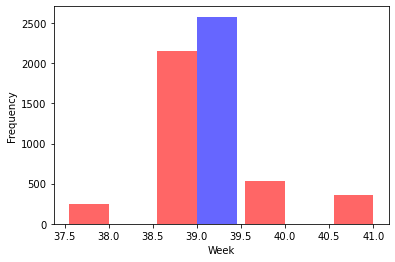

<Figure size 576x432 with 0 Axes>

In [13]:
# Histogram for Pregnancy  length
width=.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist,align='right',width=width ,color='red')
thinkplot.Hist(other_hist,align='left',width=width,color='blue')
thinkplot.Show(xlabel='Week',ylabel='Frequency')

In [14]:
firstbaby.totalwgt_lb.describe(), others.totalwgt_lb.describe() 

(count    4363.000000
 mean        7.201094
 std         1.420573
 min         0.125000
 25%         6.437500
 50%         7.312500
 75%         8.000000
 max        15.437500
 Name: totalwgt_lb, dtype: float64,
 count    4675.000000
 mean        7.325856
 std         1.394195
 min         0.562500
 25%         6.500000
 50%         7.375000
 75%         8.187500
 max        14.000000
 Name: totalwgt_lb, dtype: float64)

In [15]:
# looking for outliers in firstbaby weight distribution
Q1=firstbaby.totalwgt_lb.quantile(0.25)
Q3=firstbaby.totalwgt_lb.quantile(0.75)
IQR=Q3 - Q1
lower_limt=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

firstbaby_wt_outlier=firstbaby.totalwgt_lb > upper_limit
firstbaby_wt_clean= (firstbaby.totalwgt_lb <= upper_limit )& (firstbaby.totalwgt_lb >= lower_limt)
firstbaby.totalwgt_lb [firstbaby_wt_outlier],firstbaby.totalwgt_lb [firstbaby_wt_clean]


(52       10.5000
 104      12.0000
 178      11.0000
 253      11.0625
 714      10.6250
 819      11.3750
 1238     11.5625
 2092     10.6875
 2680     10.5000
 2771     10.5000
 2824     11.6875
 2894     11.1875
 3045     11.6250
 3959     11.5625
 4097     13.7500
 4100     12.0000
 4173     11.0000
 4421     12.0000
 5010     11.4375
 5093     12.1875
 5570     10.5000
 6024     11.0000
 6568     10.7500
 7298     12.3750
 7308     15.4375
 7398     12.3750
 7406     12.5000
 9561     11.7500
 9655     10.3750
 9734     12.1875
 9792     10.8125
 9827     10.6250
 9929     10.5000
 10139    11.0000
 10922    10.6250
 10969    11.1875
 11005    10.5625
 12191    10.5000
 12397    10.8125
 12797    10.3750
 12801    14.0000
 13027    10.8125
 13242    10.6875
 13306    10.8750
 13316    10.6875
 Name: totalwgt_lb, dtype: float64,
 0        8.8125
 2        9.1250
 5        8.5625
 8        7.5625
 10       7.8125
           ...  
 13576    6.4375
 13578    6.0000
 13581    6.3750
 

In [16]:
# looking for outliers in other weight distribution
Q1=others.totalwgt_lb.quantile(0.25)
Q3=others.totalwgt_lb.quantile(0.75)
IQR=Q3 - Q1
lower_limt=Q1 - 1.5*IQR
upper_limit= Q3 + 1.5*IQR

other_wt_outlier=others.totalwgt_lb > upper_limit
other_wt_clean= (others.totalwgt_lb <= upper_limit ) & (others.totalwgt_lb >= lower_limt)
others.totalwgt_lb [other_wt_outlier],others.totalwgt_lb [other_wt_clean]

(105      12.0000
 106      14.0000
 256      11.0000
 903      13.5000
 1061     11.7500
 2246     10.7500
 2556     11.0000
 3595     11.1875
 3668     10.8125
 4412     11.9375
 4757     10.8750
 5117     11.1250
 5252     10.8125
 6733     13.0000
 6852     10.7500
 7299     11.5000
 7485     11.1250
 7854     10.9375
 8009     10.8750
 9599     11.4375
 9661     11.0000
 9735     12.0000
 11103    11.0000
 12099    11.0000
 12802    14.0000
 Name: totalwgt_lb, dtype: float64,
 1        7.8750
 3        7.0000
 4        6.1875
 6        9.5625
 7        8.3750
           ...  
 13572    5.8125
 13574    6.1250
 13579    7.0000
 13591    7.5000
 13592    7.5000
 Name: totalwgt_lb, Length: 4557, dtype: float64)

In [17]:
# Preparing Total weight Hist data

first_hist_wt=thinkstats2.Hist(firstbaby.totalwgt_lb [firstbaby_wt_clean])
other_hist_wt=thinkstats2.Hist(others.totalwgt_lb [other_wt_clean])

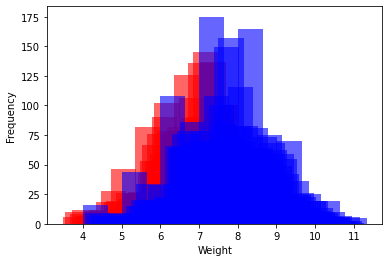

<Figure size 576x432 with 0 Axes>

In [18]:
# Histogram for baby  weight
width=.65
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist_wt,align='right',width=width,color='red')
thinkplot.Hist(other_hist_wt,align='left',width=width,color='blue')


thinkplot.Show(xlabel='Weight',ylabel='Frequency ')